# Exploring Weather Trends

In this project, I will analyze local and global temperature data and compare the temperature trends around where I live to overall global temperature trends.

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

city_list = pd.read_csv("city_list.csv")
city_data = pd.read_csv("city_data.csv")
global_data = pd.read_csv("global_data.csv")

I import pandas, NumPy and matplotlib libraries and I use Microsoft excel to do a quick exploration of these datsets.

In [2]:
# displaying the first five observations in the city list, city and global temperature dataset
print("city_list dataset")
print(city_list.head())
print("\n")
print("city_data dataset")
print(city_data.head())
print("\n")
print("global_data dataset")
print(global_data.head())

city_list dataset
        city               country
0    Abidjan         Côte D'Ivoire
1  Abu Dhabi  United Arab Emirates
2      Abuja               Nigeria
3      Accra                 Ghana
4      Adana                Turkey


city_data dataset
   year     city        country  avg_temp
0  1849  Abidjan  Côte D'Ivoire     25.58
1  1850  Abidjan  Côte D'Ivoire     25.52
2  1851  Abidjan  Côte D'Ivoire     25.67
3  1852  Abidjan  Côte D'Ivoire       NaN
4  1853  Abidjan  Côte D'Ivoire       NaN


global_data dataset
   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47


In [3]:
# dropping observations in the local temperature set with missing values
city_data_clean = city_data.dropna()
print(city_data_clean.head())

   year     city        country  avg_temp
0  1849  Abidjan  Côte D'Ivoire     25.58
1  1850  Abidjan  Côte D'Ivoire     25.52
2  1851  Abidjan  Côte D'Ivoire     25.67
7  1856  Abidjan  Côte D'Ivoire     26.28
8  1857  Abidjan  Côte D'Ivoire     25.17


I select Kansas City, Missouri from the `city_data` dataset to represent the local temperature.

According to [Wikipedia](https://en.wikipedia.org/wiki/Climate), climate is the long-term average of weather, typically averaged over a period of 30 years. Therefore, to visualize the climate changes, I calculate moving averages for both datasets. I create a separate column for these values and call it `30_years_MA`. The averages move every 30 years for both datasets.The `.rolling()` series method is very instrumental in achieving this. I also drop the datapoints that have no temperature value because I assume that these data are Missing Completely at Random (MCAR).



In [4]:
# moving average for the global temperature for a 30 year period
global_data["30_years_MA"] = global_data.iloc[:, 1].rolling(window = 30).mean()
global_data_clean = global_data.dropna()

# displaying the first observations in the modified dataset
print(global_data_clean.head())
print("\n")

    year  avg_temp  30_years_MA
29  1779      8.98     8.136667
30  1780      9.43     8.160333
31  1781      8.10     8.164333
32  1782      7.90     8.235000
33  1783      7.68     8.211333




In [5]:
kansas_city = city_data_clean[city_data_clean["city"] == "Kansas City"]
kansas_city["30_years_MA"] = kansas_city.iloc[:,3].rolling(window = 30).mean()
kansas_city_clean = kansas_city.dropna()

# displaying the first observations in the modified dataset
print(kansas_city_clean.head())

       year         city        country  avg_temp  30_years_MA
30440  1796  Kansas City  United States     11.75    10.193333
30441  1797  Kansas City  United States     11.57    10.121667
30442  1798  Kansas City  United States     12.21    10.151000
30443  1799  Kansas City  United States     11.98    10.730333
30444  1800  Kansas City  United States     11.85    10.773000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


The modified dataset for the global temperature has average temperature values from 1779 to 2015. This corresponds to 237 datapoints. That of Kansas City has average temperature values from 1796 to 2013 corresponding to 218 datapoints. Since the goal is to compare these datasets, these datasets should intuitively have the same number of datapoints. Consequently, I drop datapoints from 1779 to 1795 and from 2014 to 2015 in the global dataset. This leaves behind datapoints from 1796 to 2013 (218 rows) in both datasets. 

I proceed by using the `matplotlib` library to do a line plot.

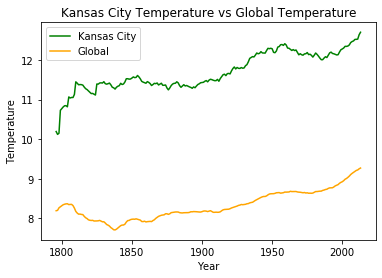

In [6]:
plt.plot(kansas_city_clean["year"], kansas_city_clean["30_years_MA"], color = 'green', label = 'Kansas City')
plt.plot(kansas_city_clean["year"], global_data_clean.loc[46:263,"30_years_MA"], color = "orange", label = "Global")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Kansas City Temperature vs Global Temperature")
plt.legend()
plt.show()

# Discussions

The plot shows the temperature trends for the world and for Kansas City over a period of 218 years. From this plot, the following observations are made:

1. Kansas City is generally warmer by about 2 degrees on average when compared to the global average 
2. In the early 19th century, the average global temperature increased by almost 1 degree and this has been the most rapid change till date
3. The global average temperature experienced more increase in the 20th century compared to the 21st century
4. Although there are few datapoints in the 21st century, there seems to be a sharp increase in average temperature for both Kansas City and the world
5. From around 1810 to 1840, there was a climate change in Kansas City as the weather got cooler in comparison to past years
6. From 1840 upwards, the average temperature for Kansas city has experienced a steady increase - Kansas City is getting hotter over time
7. Generally, the world is getting hotter

# Conclusion

I performed an analysis to show average temperature trends in the world and in Kansas City, MO over a 218 year period. This was used to compare the trends in the world to that of Kansas City. In general, the world is getting hotter!

# Recommendation

I recommend that a documentation for the dataset made available. More information on the `avg_temp` variable like the temperature unit - celsius, Fahrenheit, location of measurement - air or ocean surface  etc would be important in drawing more granular conclusions. 

-MO